<a href="https://colab.research.google.com/github/nishadrajdbc-pixel/TRAFFIC-ACCIDENT-PREDICTION/blob/main/traffic_accident_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRAFFIC ACCIDENT PREDICTION**

---



In [1]:
#IMPORTING NECCESARY PACKAGES AND LIBRARY
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

data = pd.read_csv("data.csv")

In [2]:
# PRINT FIRST 5 ROWS OF DATASET
data.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [3]:
#CHECKING THE INFORMATION ABOUT THE DATASET (columns, count, dtype)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB


In [4]:
#REMOVING ALL ROWS CONTAINING MISSING VALUES
data = data.dropna()

In [5]:
#CONVERT CATEGORICAL TEXT TO NUMBERS
encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = encoder.fit_transform(data[column])


In [6]:
#CHECKING DATASET AFTER CONVERSION INTO NUMBERS
data.head(5)

,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
2,2,1,1,1.0,60.0,4.0,0.0,1,1,1,54.0,52.0,0,0.0
3,0,0,0,2.0,60.0,3.0,0.0,1,2,0,34.0,31.0,1,0.0
4,2,1,2,1.0,195.0,11.0,0.0,1,0,1,62.0,55.0,0,1.0
6,1,1,0,0.0,60.0,4.0,0.0,1,0,3,27.0,26.0,1,1.0
7,2,0,0,0.0,60.0,4.0,0.0,1,0,1,29.0,22.0,0,1.0


In [7]:
#SEPERATING FEATURES AND TARGET
X = data.iloc[:, :-1]   # All columns except last
y = data.iloc[:, -1]    # Last column (prediction)
#SPLIT THE DATASET
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
#BUILDING DECISION TREE
model = DecisionTreeClassifier(criterion="gini",max_depth=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

In [9]:
#PREDICTION AND ACCURACY CHECK
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6172839506172839


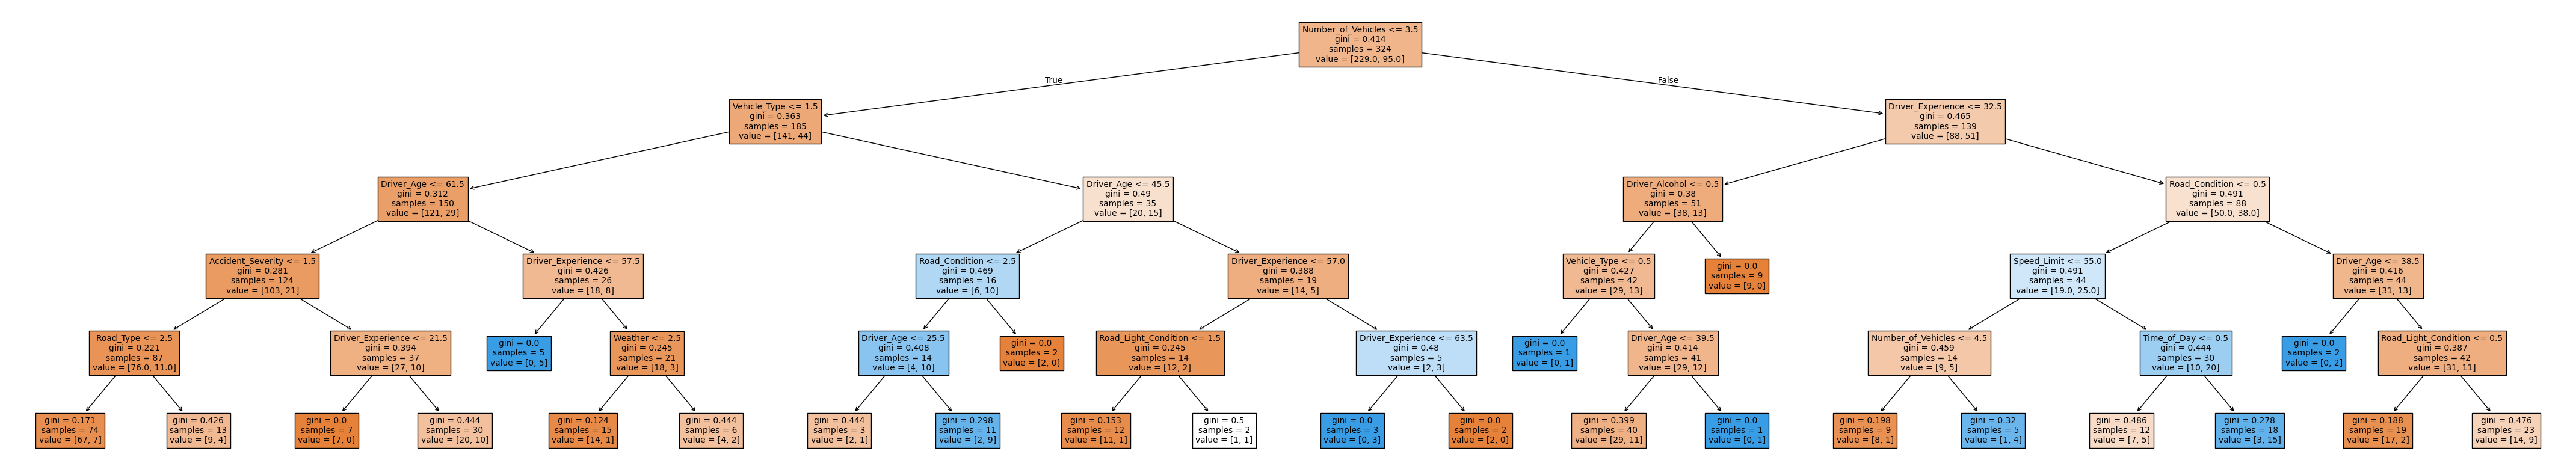

In [13]:
#VISUALIZING DECISION TREE
plt.figure(figsize=(55, 10))
plot_tree(model, feature_names=X.columns, filled=True)
plt.show()